## DDA3020 Autumn 2023 Homework 3 

### Programming Part 2：Neural Networks with PyTorch

--------------------------------------------------------------------------------------------------------------------------
In this notebook, we will build a fully-connected Neural Network and a Convolutional Neural Network with PyTorch, then apply on the MNIST data-set.

--------------------------------------------------------------------------------------------------------------------------


In [70]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib as plt

### 1. Preparation: PyTorch basics and back-propagation (10 points)
PyTorch is one of the most popular frameworks for Deep Learning. To have a quick insight on how to use PyTorch, let's say that most of the functionalities of a numpy array are also maintained for torch tensors, except that the grammar might be slightly different. 

##### 1-1 (0.5 point) 

Set the random seed to 123. Create a random Tensor `a` of shape [3,20,20] with default normal distribution $\mathcal{N}(0,1)$. 

In [71]:
torch.manual_seed(123)
a = torch.randn(3, 20, 20)

##### 1-2 (0.5 point) 
1. Transfer `a` to a numpy array and print `a[0,0]`.
2. Transfer `a` back to torch tensor and print `a[0,0]`.

**Apart from this block, in this section, you shall not to use numpy**



In [72]:
# Transfer `a` to a numpy array and print `a[0,0]`
a = np.array(a)
print('a[0,0] of array \'a\': ')
print(a[0,0])

print()

# Transfer `a` back to torch tensor and print `a[0,0]`.
a = torch.from_numpy(a)
print('a[0,0] of tensor \'a\': ')
print(a[0,0])

a[0,0] of array 'a': 
[ 0.3373702  -0.17777722 -0.3035276  -0.58801186  0.3486052   0.66034096
 -0.21963762 -0.37916982  0.76710707 -1.192502    0.6983519  -1.4097229
  0.17937961  1.895148    0.49544638  0.26919857 -0.07702024 -1.0204719
 -0.16895628  0.91776454]

a[0,0] of tensor 'a': 
tensor([ 0.33737018704414367676, -0.17777721583843231201,
        -0.30352759361267089844, -0.58801186084747314453,
         0.34860518574714660645,  0.66034096479415893555,
        -0.21963761746883392334, -0.37916982173919677734,
         0.76710706949234008789, -1.19250202178955078125,
         0.69835191965103149414, -1.40972292423248291016,
         0.17937961220741271973,  1.89514803886413574219,
         0.49544638395309448242,  0.26919856667518615723,
        -0.07702023535966873169, -1.02047193050384521484,
        -0.16895627975463867188,  0.91776454448699951172])


##### 1-3 (1 point) 

Print for `a`: 
- its shape (size)
- its mean value over all entries
- its std over all entries
- its median value over all entries

In [73]:
# Print the shape of tensor 'a'
print("Shape:", a.shape)

# Print the mean value over all entries
print("Mean value over all entries:", a.mean().item())

# Print the standard deviation over all entries
print("Standard deviation over all entries:", a.std().item())

# Print the median value over all entries
print("Median value over all entries:", torch.median(a).item())


Shape: torch.Size([3, 20, 20])
Mean value over all entries: -0.002802974311634898
Standard deviation over all entries: 0.996509313583374
Median value over all entries: -0.0016410714015364647


##### 1-4 (1 point)

Compute: 
- `b2` = the mean values of `a` along axis 2
- `b12`= the mean values of `a` along axis 1 and 2
- Print the shape of `b2` and `b12`

In [74]:
# Compute the mean values along axis 2
b2 = a.mean(dim=2)

# Compute the mean values along axis 1 and 2
b12 = a.mean(dim=(1, 2))

# Print the shape of b2 and b12
print("Shape of b2:", b2.shape)
print("Shape of b12:", b12.shape)


Shape of b2: torch.Size([3, 20])
Shape of b12: torch.Size([3])


##### 1-5 (3 point) 

Create a neural network `model_tmp` of 3 layers:

- layer 1 ---------- : receives input of length 400, has 128 neurons with bias

- activation 1 ----- : relu

- layer 2 ---------- : receives input of length 128, has 64 neurons with bias

- activation 2 ----- : relu

- layer 3 ---------- : receives input of length 64, has 4 neurons without bias

- activation 3 ----- : softmax over axis -1

[Hint]: you will mainly use modules from torch.nn



In [75]:
# Define the neural network
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()

        # Layer 1
        self.layer1 = nn.Linear(400, 128, bias=True)
        self.activation1 = nn.ReLU()

        # Layer 2
        self.layer2 = nn.Linear(128, 64, bias=True)
        self.activation2 = nn.ReLU()

        # Layer 3
        self.layer3 = nn.Linear(64, 4, bias=False)
        self.activation3 = nn.Softmax(dim = -1)

    def forward(self, x):
        # Forward through the layers
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        return x

# Create the model
model_tmp = model()

##### 1-6 (1 point) 

Flatten the two last axis of `a` and apply `model_tmp` on `a`. Print your output.


In [76]:
# Flatten a
a = torch.flatten(a,1)

# Apply the model
output = model_tmp(a)
print("Output of model_tmp applied on 'a':")
print(output)

Output of model_tmp applied on 'a':
tensor([[0.27970883250236511230, 0.27932488918304443359, 0.22022750973701477051,
         0.22073873877525329590],
        [0.28648114204406738281, 0.25987100601196289062, 0.22835181653499603271,
         0.22529605031013488770],
        [0.28373730182647705078, 0.27015921473503112793, 0.20905901491641998291,
         0.23704436421394348145]], grad_fn=<SoftmaxBackward0>)


##### 1-7 (1 point) 
Calculate the MSE loss between `this output` and an `all-1 tensor`. Print your result.

[Hint]: You can use either **torch.nn.functional** or **torch.nn** or **torch**


In [77]:
import torch.nn.functional as F
# Create a all-1 tensor
target = torch.ones_like(output)
mse_loss = F.mse_loss(output, target)
print("MSE Loss:", mse_loss.item())

MSE Loss: 0.563281774520874


##### 1-8 (1 point) 
Excecute `back-propagation` on this loss and extract the gradient of the `final layer` of model_tmp as `grd`. Print `grd[:,5]`

[Hint]: To extract the weights, you can use w_last_layer = list(model.parameters())[-1] or any other more elegant phrase.

In [78]:
model_tmp.zero_grad(True)

# Backward mse and it will calculate grad automatically
mse_loss.backward(retain_graph=True)
w_last_layer = list(model_tmp.parameters())[-1]
grd = w_last_layer.grad
print(grd[:,5])

tensor([0., 0., 0., 0.])


##### 1-9 (1 point) 
1. Create a `SGD optimizer` with learning_rate = `1e-3` associated with the parameters of model_tmp. 
2. Step this optimizer. 
3. Verify that the `variation of the parameters` of the last layer equals `1e-3 * grd`, except that there might be some machine inaccuracies.

[Hint]: You can simple print something and we'll see that most of the entries are near 0 or that most of the entries are near 0.001

In [79]:
import torch.optim as optim
model_tmp.zero_grad(True)

# Create SGD optimizer
optimizer = optim.SGD(model_tmp.parameters(), lr = 1e-3)

# Backward pass to compute the gradient
optimizer.zero_grad(True)
mse_loss.backward(retain_graph=True)

# Step the optimizer to update the parameters
optimizer.step()

# Calculate the variation in parameters
torch.set_printoptions(precision=20)
param_variation = list(model_tmp.parameters())[-1] - w_last_layer
print("\nVariation in Parameters:")
print(param_variation)



Variation in Parameters:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 

### 2. Simple fully-connected NN (MLP) (12 points)

**`Procedure`**: (1+1+1+1 = 4 points)
1. Create a fully-connected neural network, which will be a MLP. This NN will take the fattened images ([28,28] -> [28*28]) as input.  
2. Choose your optimizer and criterion (loss function).
3. Train some epoches (you can start with 10) on the MNIST data-set.
4. Keep your best model according to validation loss.
5. `Save your best model and attach it in your submitted zip`.

**`Required outputs`**: (1+1+2 = 4 points)
1. Print averaged train loss and validation loss at the end of each epoch.
2. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
3. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 


4 points are given according to your test performance. `4 is given if you have correct test prediction rate > 90.00%`



#### I find that I cannot download the dataset, so I choose to use the data from the TA directly.

In [1]:
#### prepare data-set
#### you re expected to have either pickle or torchvision in your environment

import torch
from torch.utils.data import DataLoader, Dataset, Subset
import matplotlib.pyplot as plt

# python > 3.4
# if importlib.util.find_spec('torchvision') is None: # if you do not have torchvision, use TA's downloaded data
import pickle as pkl
with open('MNIST_dataset_local','rb') as read_file:
    data = pkl.load(read_file)
    read_file.close()
train_images, train_labels = data['train']
test_images, test_labels = data['test']
val_images, val_labels = train_images[5500:], train_labels[5500:]
train_images, train_labels = train_images[:5500], train_labels[:5500]
class myMnistDataSet(Dataset):
    def __init__(self,images,labels):
        self.X = images[:,None,...]
        self.y = labels
    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        image = self.X[index]
        label = self.y[index]
        return torch.Tensor(image), torch.tensor(label)[0]
mnist_train = myMnistDataSet(train_images, train_labels.astype('int64'))
mnist_test = myMnistDataSet(test_images, test_labels.astype('int64'))
mnist_val = myMnistDataSet(val_images, val_labels.astype('int64'))

# else: # use torchvision
#     from torchvision import transforms, datasets
#
#     mnist_download_path = './MNIST_dataset'
#     datasets.MNIST(root=mnist_download_path, download=True)
#
#     mnist_train = datasets.MNIST(root = mnist_download_path, train = True, transform=transforms.ToTensor())
#     mnist_val   = Subset(mnist_train, list(range(5500,6000)))
#     mnist_train = Subset(mnist_train, list(range(5500)))
#
#     mnist_test  = datasets.MNIST(root = mnist_download_path, train = False, transform=transforms.ToTensor())


def get_loaders(batch_size):
    train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
    val_loader   = DataLoader(mnist_val, batch_size = batch_size, shuffle=False)
    test_loader  = DataLoader(mnist_test, batch_size = batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# get to know your loader
batch_size = 10
train_loader, val_loader, test_loader = get_loaders(batch_size)

for im, l in val_loader:
    break

print(im.shape, l.shape)
print(l)

torch.Size([10, 1, 28, 28]) torch.Size([10])
tensor([1, 9, 0, 9, 7, 0, 5, 1, 2, 2])


Epoch 1, Train Loss: 3.1982, Validation Loss: 1.3365
Epoch 2, Train Loss: 0.7093, Validation Loss: 1.0488
Epoch 3, Train Loss: 0.3467, Validation Loss: 0.9261
Epoch 4, Train Loss: 0.1812, Validation Loss: 0.8434
Epoch 5, Train Loss: 0.1403, Validation Loss: 0.9436
Epoch 6, Train Loss: 0.0781, Validation Loss: 0.9137
Epoch 7, Train Loss: 0.0597, Validation Loss: 0.8351
Epoch 8, Train Loss: 0.1312, Validation Loss: 0.9132
Epoch 9, Train Loss: 0.0837, Validation Loss: 0.8173
Epoch 10, Train Loss: 0.0388, Validation Loss: 0.7912


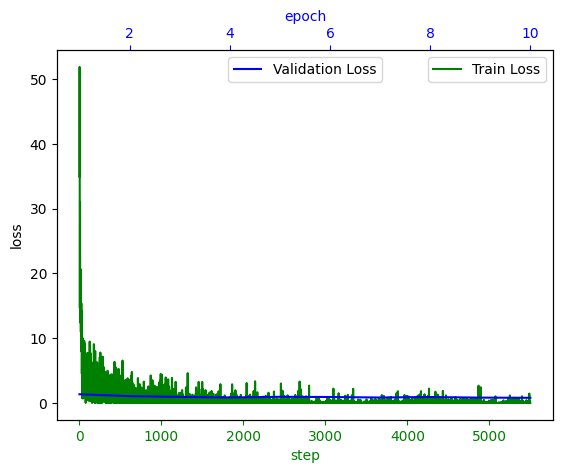

Test Loss: 0.7882
Correct Prediction Rate: 91.31%


In [15]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a fully-connected neural network (MLP)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Step 2: Choose optimizer and loss_function
mlp = MLP()
optimizer = optim.Adam(mlp.parameters(), lr=0.00012)
loss_function = nn.CrossEntropyLoss()

# Step 3: Train for epochs
num_epochs = 10

# Use train_losses to record the losses while step.
train_losses = []
validation_losses = []
loss_list = []
best_validation_loss = None

# Training process
for epoch in range(num_epochs):
    mlp.train()
    current_train_loss = 0.0

    for im, l in train_loader:
        optimizer.zero_grad()
        outputs = mlp(im)
        loss = loss_function(outputs, l)
        loss.backward()
        optimizer.step()
        current_train_loss += loss.item()
        loss_list.append(loss.item())

    average_train_loss = current_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    mlp.eval()
    current_validation_loss = 0.0
    for im, l in val_loader:
        outputs = mlp(im)
        loss = loss_function(outputs, l)
        current_validation_loss += loss.item()

    average_validation_loss = current_validation_loss / len(val_loader)
    validation_losses.append(average_validation_loss)

    # Print averaged train loss and validation loss at the end of each epoch
    print(f'Epoch {epoch + 1}, Train Loss: {average_train_loss:.4f}, Validation Loss: {average_validation_loss:.4f}')

    # Save the best model
    if not best_validation_loss or average_validation_loss < best_validation_loss:
        best_validation_loss = average_validation_loss
        torch.save(mlp, 'best_mlp.pt')

loss_list = np.array(loss_list)

# Step 4: Visualize the results
fig, ax1 = plt.subplots()
ax1.plot(range(1,len(loss_list)+1), loss_list, label='Train Loss',color = 'g')
plt.legend(loc = 1)
ax1.set_xlabel('step', color='g')
ax1.set_ylabel('loss')
ax1.tick_params('x', colors='g')
ax2 = ax1.twiny()
ax2.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss',color = 'b')
ax2.set_xlabel('epoch', color='b')
ax2.tick_params('x', colors='b')
plt.legend(loc = 9)
plt.show()

# Load the best model
best_model = torch.load('best_mlp.pt')

# Test the model
best_model.eval()
test_loss = 0.0
correct_predictions = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = best_model(images)
        loss = loss_function(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

# Print test loss and rate of correct prediction
average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / len(mnist_test)

print(f'Test Loss: {average_test_loss:.4f}')
print(f'Correct Prediction Rate: {accuracy * 100:.2f}%')

### 3. Bonus - Weight game (Bonus 2+4+1 = 7 points. Bonus is for this exercise exclusively)

3-1. Display
- The average image of respectively label 1-10 over the validation set.

3-2. Build a 1-layer NN for this problem. Use `Binary Cross Entropy Loss` as validation criterion. Train some epoches until `validation loss < 0.1`. This 1-layer NN has no more than 2 parameters (w and b). Display w with respect to label 1-10, for:

 - Before training (randomly initialized weights). Print the validation loss at this moment.
 - After val loss < 0.1 

3-3. Use **`one word`** to summarize the mecanism with which this NN works.

[Hint]: 
 - For display, please refer to solution_HW1_polynomial_regression for loop structure. This time you will use plt.imshow()  
 - The weight shape is [10,28*28]. Reshape to [10,28,28] then plot 10 times [28,28]

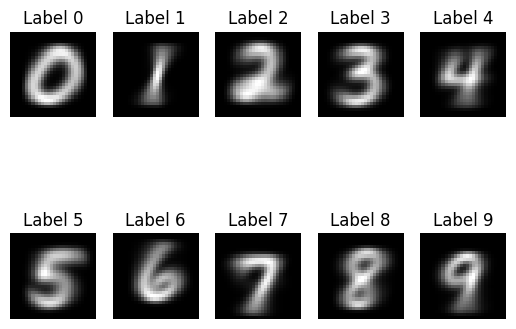

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
# Use the function to get the average image for each label
def get_average_images(val_loader):
    averages = torch.zeros((10, 28, 28))
    counts = torch.zeros(10)

    with torch.no_grad():
        for im, l in val_loader:
            for i in range(len(l)):
                label = l[i].item()
                averages[label] += im[i][0]
                counts[label] += 1

    averages /= counts.view(-1, 1, 1)
    return averages

# Display the average images
def display_average_images(averages):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(averages[i], cmap='gray')
        plt.title(f'Label {i}')
        plt.axis('off')
    plt.show()

# Call the functions
averages = get_average_images(val_loader)
display_average_images(averages)


In [9]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import random

class BONUS(nn.Module):
    def __init__(self):
        super(BONUS, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

bonus = BONUS()
optimizer = optim.Adam(bonus.parameters(), lr=0.00012)
loss_function = nn.CrossEntropyLoss()

train_losses = []
validation_losses = []
best_validation_loss = None

bonus.eval()
current_validation_loss = 0.0
im, l = train_loader[random.randint(0,len(train_loader))]
optimizer.zero_grad()
outputs = bonus(im)

for im, l in val_loader:
    outputs = bonus(im)
    loss = loss_function(outputs, l)
    current_validation_loss += loss.item()
average_validation_loss = current_validation_loss / len(val_loader)

# Training process
while average_validation_loss > 0.1:
    for im, l in train_loader:
        optimizer.zero_grad()
        outputs = bonus(im)
        loss = loss_function(outputs, l)
        loss.backward()
        optimizer.step()

    # Calculate validation loss
    val_loss = 0.0
    with torch.no_grad():
        for im, l in val_loader:
            outputs = bonus(im)
            val_loss += loss_function(outputs, l).item()
    val_loss /= len(val_loader)

trained_weights = np.array(bonus.linear.weight)
trained_bias = np.array(bonus.linear.bias)

# Print the trained weights and bias
print(f'Trained Weights:\n{trained_weights}')
print(f'Trained Bias:\n{trained_bias}')

KeyboardInterrupt: 

**One word**: Linear

### 4. CNN (13 points)

`Build your own CNN from scratch (3 points)` to solve this classification problem. Choose any optimizer and criterion that you want. Regulate your CNN structure and try to have as good result as possible.


**`Required outputs`**: (0.5+1+1+2+1 = 5.5 points)
1. Print the number of parameters of your cnn model.
2. Print averaged train loss and validation loss at the end of each epoch.
3. After the training finished, plot your train (validation, respectively) loss of each step (epoch, respectively) on a same graph. Keep the x-axis aligned.
4. Test your best model on test set and print (1) test loss value as well as (2) the rate of correct prediction. 
5. Display the confusion matrix of your best model on the test set.
6. `Save your best model and attach it in your submitted zip`.


4.5 points are given according to your test performance. `4.5 is given if you have correct test prediction rate > 97.00%.`

[Hint]: 
1. If you use batch normalizations, be aware of what BatchNorm does while fed with data (you will need to add two lines of codes to manage your training and testing).
1. As for confusion matrix (multi-class classfication), consider a $10\times 10$ matrix where each row represents "gt is" and each column represents "is predicted as", then do a counting with all the test samples. You will obtain a gray-scale image (2D matrix).





------------------------------------------------------------------------------------------------------------------------------------------------
`Discussion for computational cost`: 

If you have NVIDIA card on your PC, you can use `cuda` to accelerate the calculation. However, theoretically, `2 layers of CNN are enough` to have at least 97% test accuracy for this exercise. 

If your PC has no worse than Intel Core i5-8250U Processor (as had the TA's PC in 2019) and your code is well done, the program shall be guaranteed to run fast.

Conventionally, `you are encouraged to construct not too complicated CNN` to save computational cost, since MNIST is a relatively simple problem. However, `as long as your code works out for you, no point will be removed if your CNN is huge`.

------------------------------------------------------------------------------------------------------------------------------------------------


Epoch 1, Train Loss: 0.3024, Validation Loss: 0.1513
Epoch 2, Train Loss: 0.1082, Validation Loss: 0.1402
Epoch 3, Train Loss: 0.0604, Validation Loss: 0.1151
Epoch 4, Train Loss: 0.0586, Validation Loss: 0.1242
Epoch 5, Train Loss: 0.0508, Validation Loss: 0.1351
Epoch 6, Train Loss: 0.0356, Validation Loss: 0.1272
Epoch 7, Train Loss: 0.0174, Validation Loss: 0.0942
Epoch 8, Train Loss: 0.0182, Validation Loss: 0.1311
Epoch 9, Train Loss: 0.0192, Validation Loss: 0.1950
Epoch 10, Train Loss: 0.0311, Validation Loss: 0.1138


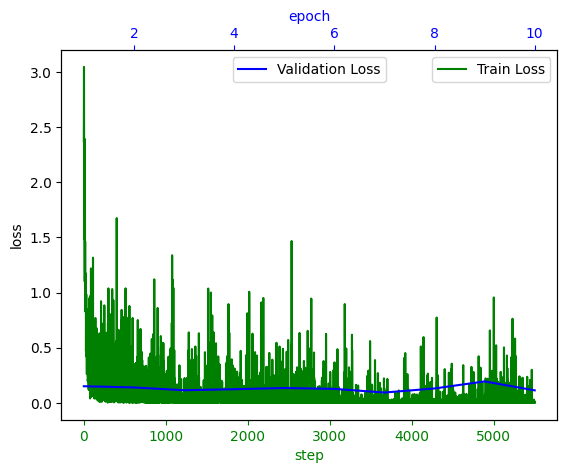

Test Loss: 0.0724
Correct Prediction Rate: 97.78%


Text(0.5, 1.0, 'Confusion Matrix')

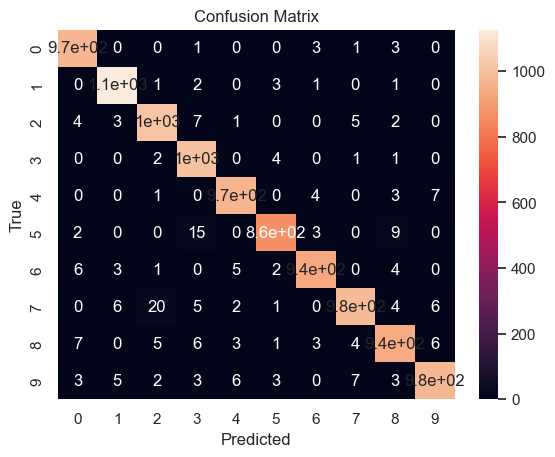

In [18]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(123)

# Step 1: Create a simple CNN cnn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(32*7*7, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)  # Flatten before fully connected layer
        x = self.fc1(x)
        return x

# Step 2: Choose optimizer and loss_function
cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.0012)

# Step 3: Train for some epochs
num_epochs = 10

# Use train_losses to record the losses while step.
train_losses = []
validation_losses = []
loss_list = []
best_validation_loss = None

# Training process
for epoch in range(num_epochs):
    cnn.train()
    current_train_loss = 0.0

    for im, l in train_loader:
        optimizer.zero_grad()
        outputs = cnn(im)
        loss = loss_function(outputs, l)
        loss.backward()
        optimizer.step()
        current_train_loss += loss.item()
        loss_list.append(loss.item())

    average_train_loss = current_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    cnn.eval()
    running_validation_loss = 0.0
    for im, l in val_loader:
        outputs = cnn(im)
        loss = loss_function(outputs, l)
        running_validation_loss += loss.item()

    average_validation_loss = running_validation_loss / len(val_loader)
    validation_losses.append(average_validation_loss)

    # Print averaged train loss and validation loss at the end of each epoch
    print(f'Epoch {epoch + 1}, Train Loss: {average_train_loss:.4f}, Validation Loss: {average_validation_loss:.4f}')

    # Save the best model
    if not best_validation_loss or average_validation_loss < best_validation_loss:
        best_validation_loss = average_validation_loss
        torch.save(cnn, 'best_cnn.pt')

# Step 4: Visualize the results
loss_list = np.array(loss_list)

# Step 7: Test your best model on the test set
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
fig, ax1 = plt.subplots()
ax1.plot(range(1,len(loss_list)+1), loss_list, label='Train Loss',color = 'g')
plt.legend(loc = 1)
ax1.set_xlabel('step', color='g')
ax1.set_ylabel('loss')
ax1.tick_params('x', colors='g')
ax2 = ax1.twiny()
ax2.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss',color = 'b')
ax2.set_xlabel('epoch', color='b')
ax2.tick_params('x', colors='b')
plt.legend(loc = 9)
plt.show()

# Load the best model
best_model = torch.load('best_cnn.pt')

# Test the model
best_model.eval()
test_loss = 0.0
correct_predictions = 0
all_labels = []
all_predicted = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = best_model(images)
        loss = loss_function(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()

        # Use two arrays to record labels and predicted in order to visualize at last
        all_labels.extend(np.array(labels))
        all_predicted.extend(np.array(predicted))

# Print test loss and rate of correct prediction
average_test_loss = test_loss / len(test_loader)
accuracy = correct_predictions / len(mnist_test)
print(f'Test Loss: {average_test_loss:.4f}')
print(f'Correct Prediction Rate: {accuracy * 100:.2f}%')

# Draw the confusion matrix
sns.set()
f,ax = plt.subplots()
conf_matrix = confusion_matrix(all_labels, all_predicted,labels=[0,1,2,3,4,5,6,7,8,9])
sns.heatmap(conf_matrix,annot=True,ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

